<a href="https://colab.research.google.com/github/seplanas/Actividad-4-Regresi-n-Lineal-Simple-/blob/main/Actividad_4(_Regresi%C3%B3n_lineal)_A01702733.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/DF_Mexico.csv')

In [3]:
#Se quitan las variables innecesarias para la regresión
df = df[['host_acceptance_rate', 'host_response_rate',
        'price','number_of_reviews', 'review_scores_location',
        'review_scores_cleanliness', 'availability_365', 'reviews_per_month',
        'review_scores_communication','room_type']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         22181 non-null  object 
 1   host_response_rate           21133 non-null  object 
 2   price                        24224 non-null  object 
 3   number_of_reviews            24224 non-null  int64  
 4   review_scores_location       20571 non-null  float64
 5   review_scores_cleanliness    20573 non-null  float64
 6   availability_365             24224 non-null  int64  
 7   reviews_per_month            20628 non-null  float64
 8   review_scores_communication  20572 non-null  float64
 9   room_type                    24224 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.8+ MB


In [5]:
#Es necesario limpiar los valores que aparecen como object porque son numeros
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')

#price
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')


<ipython-input-5-e7776a062c3a>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [6]:
df.head(5)

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,room_type
0,NaN,100,1434.00,21,5.00,4.95,324,0.19,4.95,Entire home/apt
1,NaN,NaN,830.00,61,4.95,4.88,346,0.54,5.00,Entire home/apt
2,90,100,1469.00,39,4.58,4.71,87,0.31,4.92,Entire home/apt
3,NaN,NaN,3658.00,0,NaN,NaN,363,NaN,NaN,Entire home/apt
4,86,100,18000.00,64,4.98,4.70,357,0.46,4.78,Entire home/apt


In [7]:
#Convertir los objects a numeros
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])
df['price'] = pd.to_numeric(df['price'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         22181 non-null  float64
 1   host_response_rate           21133 non-null  float64
 2   price                        24224 non-null  float64
 3   number_of_reviews            24224 non-null  int64  
 4   review_scores_location       20571 non-null  float64
 5   review_scores_cleanliness    20573 non-null  float64
 6   availability_365             24224 non-null  int64  
 7   reviews_per_month            20628 non-null  float64
 8   review_scores_communication  20572 non-null  float64
 9   room_type                    24224 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 1.8+ MB


##**Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers**

###Nulos

In [9]:
valores_nulos=df.isnull().sum()
valores_nulos

host_acceptance_rate           2043
host_response_rate             3091
price                             0
number_of_reviews                 0
review_scores_location         3653
review_scores_cleanliness      3651
availability_365                  0
reviews_per_month              3596
review_scores_communication    3652
room_type                         0
dtype: int64

In [10]:
df["host_acceptance_rate"]=df["host_acceptance_rate"].fillna(
    round(df["host_acceptance_rate"].mean(),1)
    )
df["host_response_rate"]=df["host_response_rate"].fillna(
    round(df["host_response_rate"].mean(),1)
    )
df["review_scores_cleanliness"]=df["review_scores_cleanliness"].fillna(
    round(df["review_scores_cleanliness"].mean(),1)
    )
df["review_scores_location"]=df["review_scores_location"].fillna(
    round(df["review_scores_location"].mean(),1)
    )
df["reviews_per_month"]=df["reviews_per_month"].fillna(
    round(df["reviews_per_month"].mean(),1)
    )
df["review_scores_communication"]=df["review_scores_communication"].fillna(
    round(df["review_scores_communication"].mean(),1)
    )

###Outliers

In [11]:
num = df.select_dtypes(include=['float64', 'int64']).columns
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df[col] = np.where(df[col] < (Q1 - 1.5 * IQR), df[col].median(), df[col])
    df[col] = np.where(df[col] > (Q3 + 1.5 * IQR), df[col].median(), df[col])

In [12]:
df.describe()

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
count,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000
mean,97.438181,98.703868,1055.487863,19.383587,4.886907,4.818942,245.593791,1.420541,4.887060
std,4.295002,2.594492,644.690944,23.688202,0.115115,0.155051,123.902902,1.023511,0.114509
min,79.000000,87.000000,0.000000,0.000000,4.500000,4.320000,0.000000,0.010000,4.500000
25%,97.000000,99.000000,559.000000,2.000000,4.800000,4.700000,144.000000,0.550000,4.800000
50%,99.000000,100.000000,960.000000,12.000000,4.910000,4.820000,304.000000,1.520000,4.900000
75%,100.000000,100.000000,1377.000000,27.000000,5.000000,4.960000,356.000000,1.790000,5.000000
max,100.000000,100.000000,3159.000000,104.000000,5.000000,5.000000,365.000000,4.480000,5.000000


##**Correlación**

In [13]:
hotel_room = df[df['room_type'] == 'Hotel room']
shared_room = df[df['room_type'] == 'Shared room']

In [22]:
def correlacion(df, indep, dep):
  print(f"Correlación entre {indep} y {dep}")

  X = df[[indep]]
  y = df[dep]

  model= LinearRegression()
  model.fit(X, y)

  print('Model dict: ', model.__dict__)

  y_pred = model.predict(X)

  if 'Predicciones' in df:
    df.drop('Predicciones', axis=1, inplace=True)

  df.insert(0, 'Predicciones', y_pred)

  sns.scatterplot(x=indep, y=dep, color="blue", data=df)
  sns.scatterplot(x=indep, y='Predicciones', color="red", data=df)
  sns.lineplot(x=indep, y='Predicciones', color="red", data=df)
  plt.show()

  coef_Deter = model.score(X, y)
  print('coef determinación', coef_Deter)

  coef_Correl=np.sqrt(coef_Deter)
  print('coef determinación', coef_Correl)

  return coef_Deter, coef_Correl

Correlación entre host_acceptance_rate y host_response_rate
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.1000706]), 'rank_': 1, 'singular_': array([65.18818911]), 'intercept_': 89.25263625271336}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


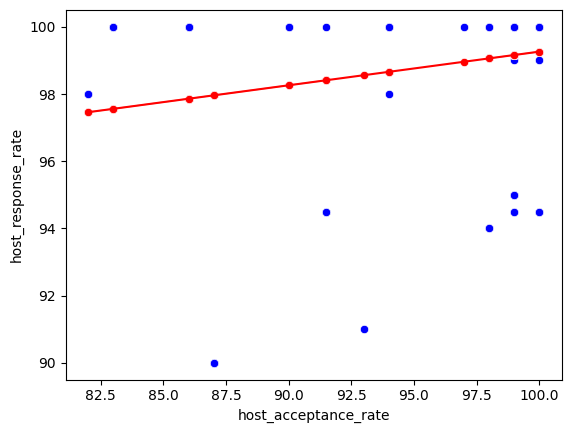

coef determinación 0.05398953762122072
coef determinación 0.23235648822707902
Correlación entre host_acceptance_rate y price
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([-12.16907872]), 'rank_': 1, 'singular_': array([65.18818911]), 'intercept_': 2467.26097790106}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


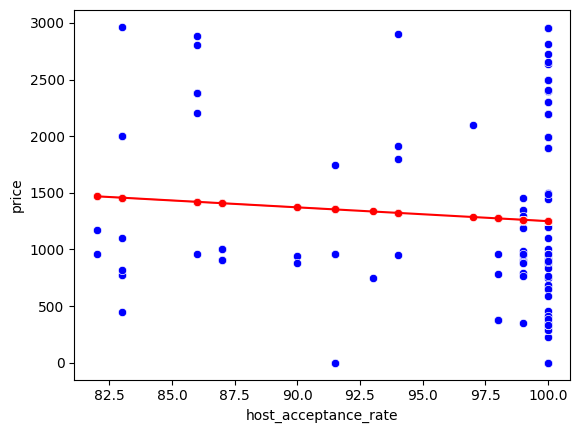

coef determinación 0.007845310347492473
coef determinación 0.08857375653935241
Correlación entre host_acceptance_rate y number_of_reviews
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.30638899]), 'rank_': 1, 'singular_': array([65.18818911]), 'intercept_': -15.31456873573827}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


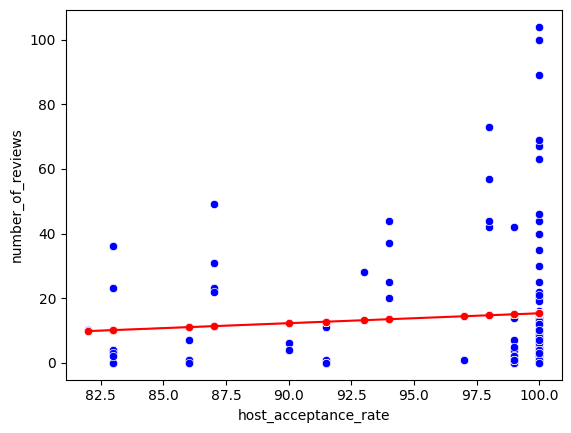

coef determinación 0.0070323820466828835
coef determinación 0.08385929910679485
Correlación entre review_scores_location y review_scores_cleanliness
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_location'], dtype=object), 'n_features_in_': 1, 'coef_': array([1.02011637]), 'rank_': 1, 'singular_': array([1.26615669]), 'intercept_': -0.18883967320299178}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


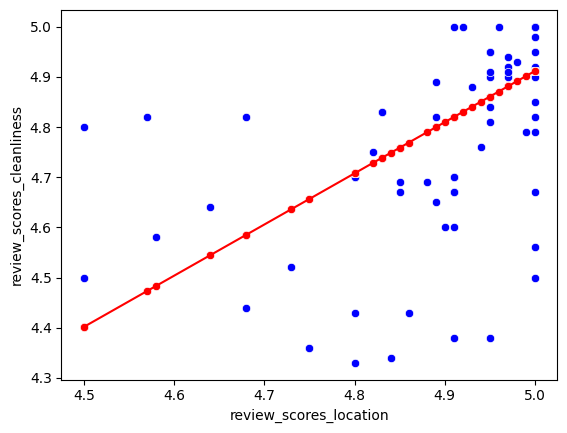

coef determinación 0.4039914230447007
coef determinación 0.6356031962197017
Correlación entre availability_365 y number_of_reviews
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.01193961]), 'rank_': 1, 'singular_': array([1318.27975476]), 'intercept_': 11.309372114008955}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


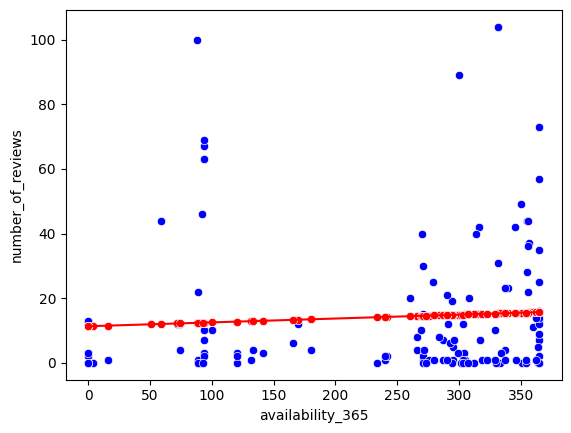

coef determinación 0.004367306270326665
coef determinación 0.06608559805529995
Correlación entre reviews_per_month y review_scores_communication
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['reviews_per_month'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.06356783]), 'rank_': 1, 'singular_': array([8.74078926]), 'intercept_': 4.919322154043148}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


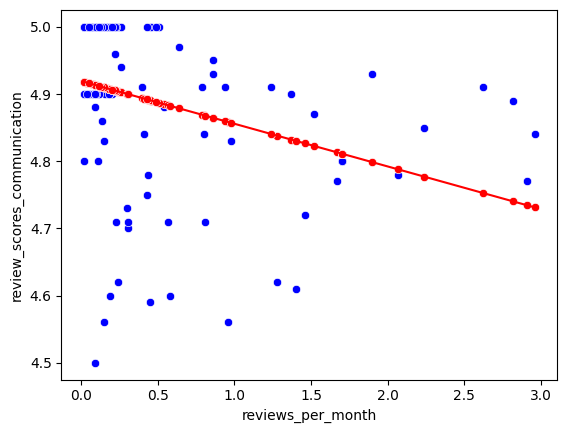

coef determinación 0.1632181440228544
coef determinación 0.4040026534849176
Correlación entre host_acceptance_rate y host_response_rate
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.12624256]), 'rank_': 1, 'singular_': array([75.13333995]), 'intercept_': 86.13221176300588}


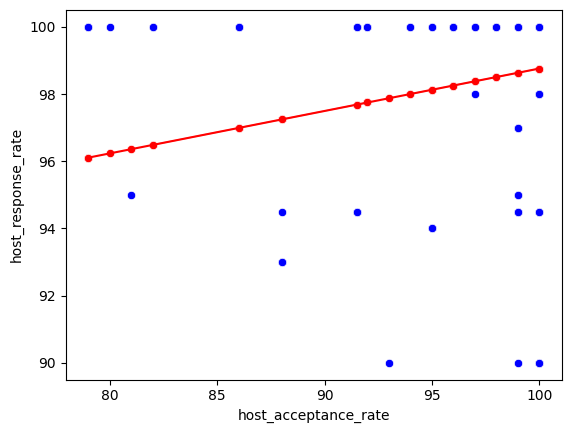

coef determinación 0.044101316328930995
coef determinación 0.21000313409311536
Correlación entre host_acceptance_rate y price
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.72131067]), 'rank_': 1, 'singular_': array([75.13333995]), 'intercept_': 530.089442472613}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


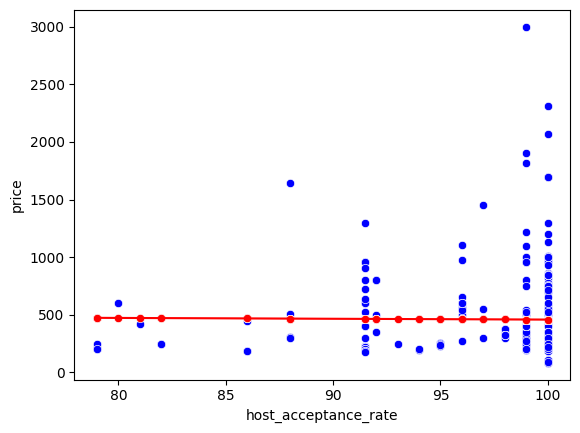

coef determinación 6.431193440536997e-05
coef determinación 0.008019472202418934
Correlación entre host_acceptance_rate y number_of_reviews
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.16027631]), 'rank_': 1, 'singular_': array([75.13333995]), 'intercept_': 22.807198408938856}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


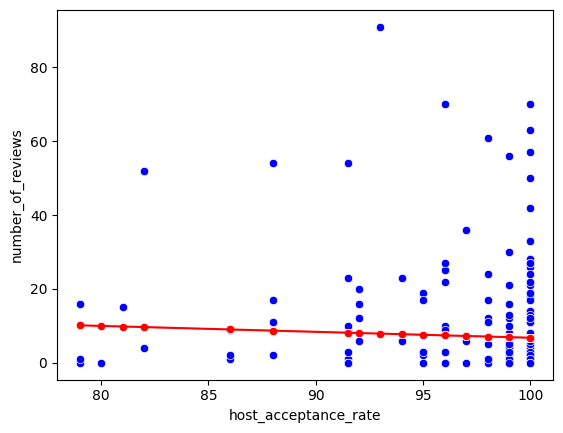

coef determinación 0.0027722898106061766
coef determinación 0.052652538501065424
Correlación entre review_scores_location y review_scores_cleanliness
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_location'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.43634857]), 'rank_': 1, 'singular_': array([1.93160935]), 'intercept_': 2.6420925322575615}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


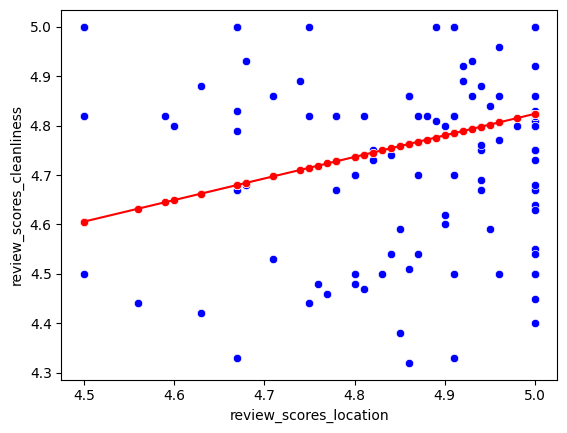

coef determinación 0.10514358175747207
coef determinación 0.32425851069397094
Correlación entre availability_365 y number_of_reviews
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.00598895]), 'rank_': 1, 'singular_': array([1834.46262602]), 'intercept_': 9.00107185543288}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


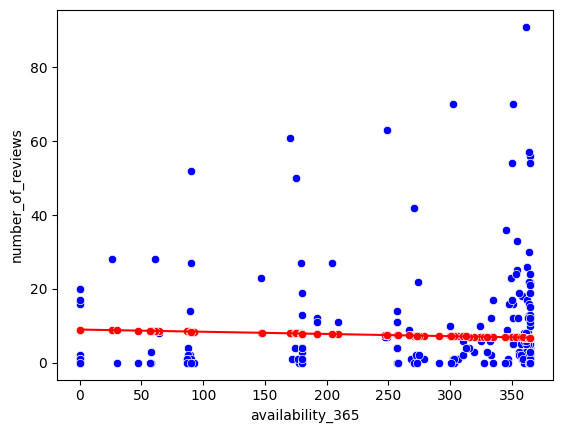

coef determinación 0.002307565459284344
coef determinación 0.04803712584329275
Correlación entre reviews_per_month y review_scores_communication
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['reviews_per_month'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.03284249]), 'rank_': 1, 'singular_': array([14.28606966]), 'intercept_': 4.888139615389605}


<ipython-input-22-37e80eb05270>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


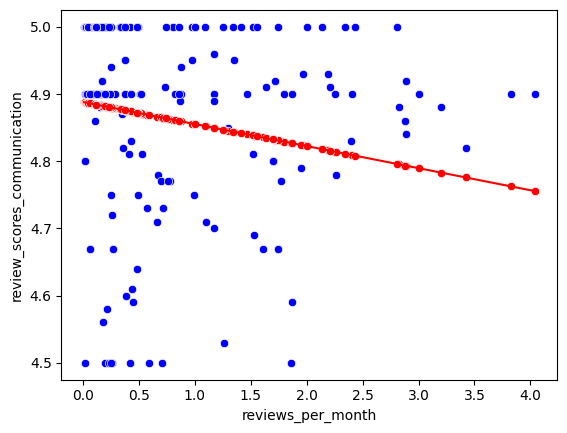

coef determinación 0.0513204404300579
coef determinación 0.22654015191585333


(0.0513204404300579, 0.22654015191585333)

In [23]:
correlacion(hotel_room,'host_acceptance_rate','host_response_rate')
correlacion(hotel_room,'host_acceptance_rate','price')
correlacion(hotel_room,'host_acceptance_rate','number_of_reviews')
correlacion(hotel_room,'review_scores_location','review_scores_cleanliness')
correlacion(hotel_room,'availability_365','number_of_reviews')
correlacion(hotel_room,'reviews_per_month','review_scores_communication')

correlacion(shared_room,'host_acceptance_rate','host_response_rate')
correlacion(shared_room,'host_acceptance_rate','price')
correlacion(shared_room,'host_acceptance_rate','number_of_reviews')
correlacion(shared_room,'review_scores_location','review_scores_cleanliness')
correlacion(shared_room,'availability_365','number_of_reviews')
correlacion(shared_room,'reviews_per_month','review_scores_communication')


In [26]:
hotel_room.corr()

<ipython-input-26-01212d23472a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hotel_room.corr()


,Predicciones,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
Predicciones,1.000000,-0.138778,0.014011,0.127513,-0.200366,0.340640,0.382624,0.178317,-1.000000,0.404003
host_acceptance_rate,-0.138778,1.000000,0.232356,-0.088574,0.083859,0.026715,-0.090662,0.012265,0.138778,0.016954
host_response_rate,0.014011,0.232356,1.000000,0.243896,-0.076361,0.081272,-0.015928,-0.036753,-0.014011,-0.051907
price,0.127513,-0.088574,0.243896,1.000000,-0.311760,0.174159,0.269493,0.321874,-0.127513,0.181839
number_of_reviews,-0.200366,0.083859,-0.076361,-0.311760,1.000000,-0.046235,-0.265922,0.066086,0.200366,-0.187761
review_scores_location,0.340640,0.026715,0.081272,0.174159,-0.046235,1.000000,0.635603,0.131081,-0.340640,0.647855
review_scores_cleanliness,0.382624,-0.090662,-0.015928,0.269493,-0.265922,0.635603,1.000000,0.110227,-0.382624,0.553294
availability_365,0.178317,0.012265,-0.036753,0.321874,0.066086,0.131081,0.110227,1.000000,-0.178317,0.083971
reviews_per_month,-1.000000,0.138778,-0.014011,-0.127513,0.200366,-0.340640,-0.382624,-0.178317,1.000000,-0.404003
review_scores_communication,0.404003,0.016954,-0.051907,0.181839,-0.187761,0.647855,0.553294,0.083971,-0.404003,1.000000


In [27]:
shared_room.corr()

<ipython-input-27-61c32ddcfe8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  shared_room.corr()


,Predicciones,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
Predicciones,1.000000,0.032536,0.033742,-0.018594,-0.140320,0.338196,0.299711,-0.054565,-1.000000,0.226540
host_acceptance_rate,0.032536,1.000000,0.210003,-0.008019,-0.052653,0.106980,0.085608,-0.009010,-0.032536,0.075944
host_response_rate,0.033742,0.210003,1.000000,-0.246673,-0.029428,0.114360,0.074429,0.018145,-0.033742,0.024371
price,-0.018594,-0.008019,-0.246673,1.000000,-0.136798,-0.066849,0.021180,-0.173051,0.018594,-0.018657
number_of_reviews,-0.140320,-0.052653,-0.029428,-0.136798,1.000000,0.030168,-0.145208,-0.048037,0.140320,-0.059718
review_scores_location,0.338196,0.106980,0.114360,-0.066849,0.030168,1.000000,0.324259,0.052287,-0.338196,0.349138
review_scores_cleanliness,0.299711,0.085608,0.074429,0.021180,-0.145208,0.324259,1.000000,0.028875,-0.299711,0.420846
availability_365,-0.054565,-0.009010,0.018145,-0.173051,-0.048037,0.052287,0.028875,1.000000,0.054565,0.057058
reviews_per_month,-1.000000,-0.032536,-0.033742,0.018594,0.140320,-0.338196,-0.299711,0.054565,1.000000,-0.226540
review_scores_communication,0.226540,0.075944,0.024371,-0.018657,-0.059718,0.349138,0.420846,0.057058,-0.226540,1.000000
